# Importing Libraries

In [1]:
# Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split

# Classification Model Building
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Regression Model Building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Classification Model Performance Testing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Miscellaneous
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# IBM Watson Cloud
from ibm_watson_machine_learning import APIClient
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

# Data Collection

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='aIdW0KYO13GKg2tlS7gG8A0AVJ8CUZcGCg5yMFxnibEB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'collegemodeldeployment-donotdelete-pr-jmfjsvtvx9cbu9'
object_key = 'Placement_Data_Full_Class.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)


In [3]:
df.head

<bound method NDFrame.head of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech  

# Data Preparation

In [4]:
df.drop('sl_no',axis=1,inplace=True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Handling Missing Values

In [5]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
df.fillna(value = 0, inplace =True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Feature Selection

<AxesSubplot:xlabel='gender', ylabel='count'>

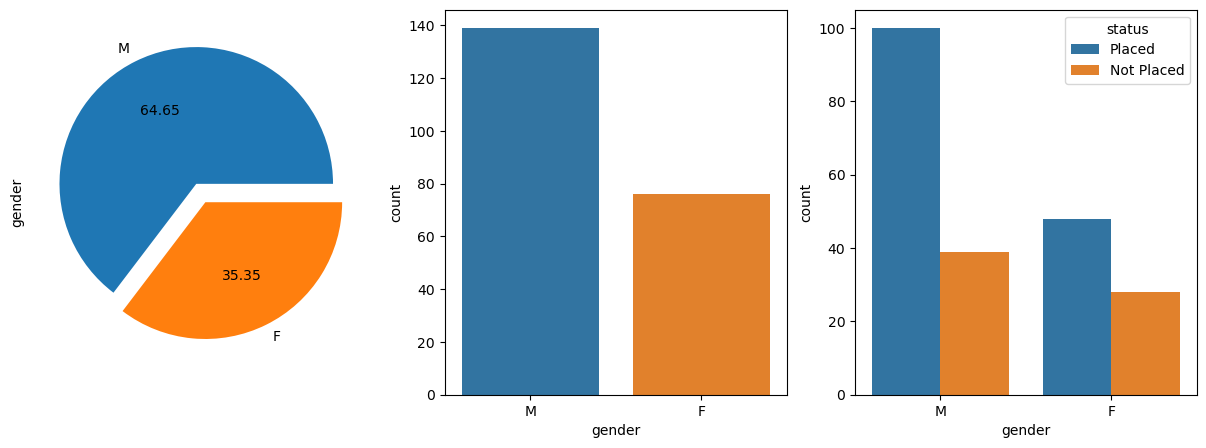

In [7]:
plt.figure(figsize = (15,5))
explode = [0.15,0]
plt.subplot(131)
df['gender'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'gender')
plt.subplot(133)
sns.countplot(data=df,x='gender',hue='status')

In [8]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

Text(0.5, 0, 'Salary (100k)')

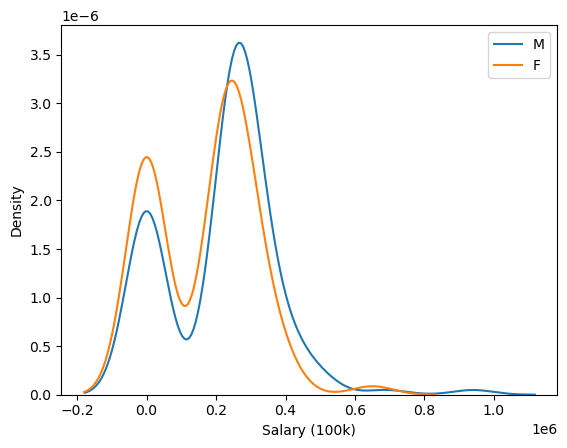

In [9]:
sns.kdeplot(df.salary[df.gender=='M'])
sns.kdeplot(df.salary[df.gender=='F'])
plt.legend(['M','F'])
plt.xlabel("Salary (100k)")

<AxesSubplot:xlabel='salary', ylabel='gender'>

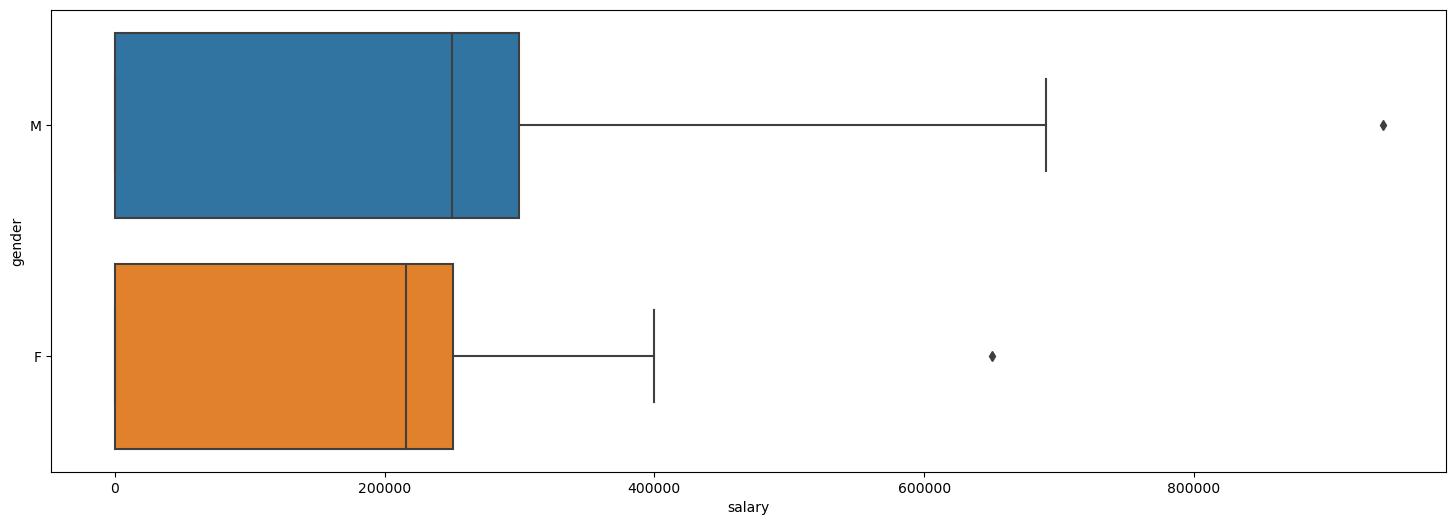

In [10]:
plt.figure(figsize=(18,6))
sns.boxplot(x="salary",y="gender",data=df)

In [11]:
df.gender[df.status=="Not Placed"].value_counts()


M    39
F    28
Name: gender, dtype: int64

### Secondary Education

<AxesSubplot:xlabel='ssc_b', ylabel='count'>

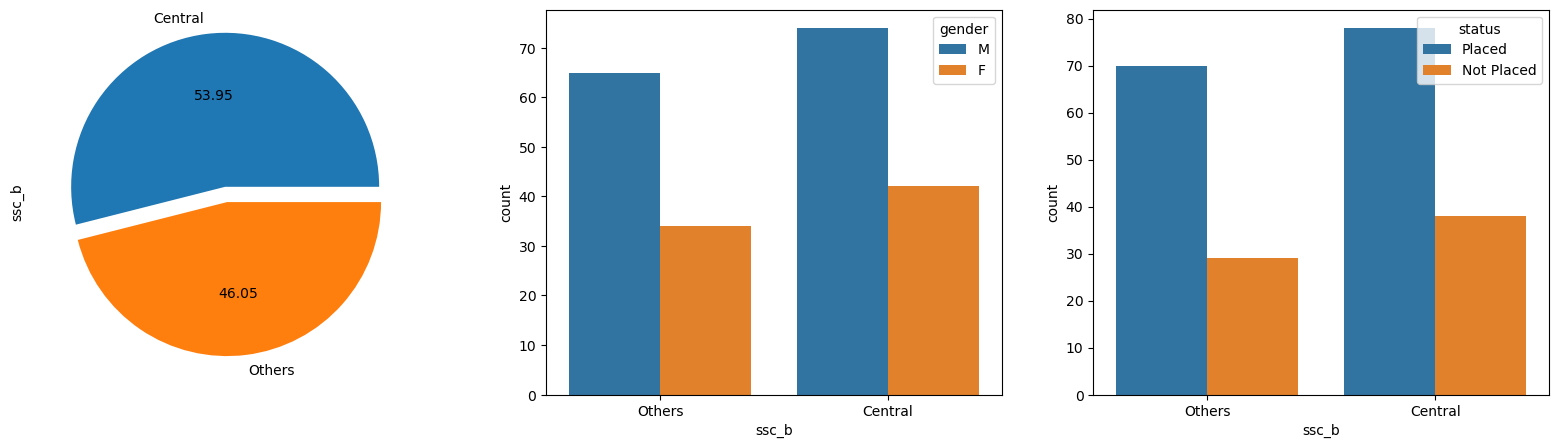

In [12]:
plt.figure(figsize = (20,5))
explode = [0.1,0]
plt.subplot(131)
df['ssc_b'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'ssc_b',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'ssc_b',hue =df['status'])

Text(0.5, 0, 'Secondary Education Percentage')

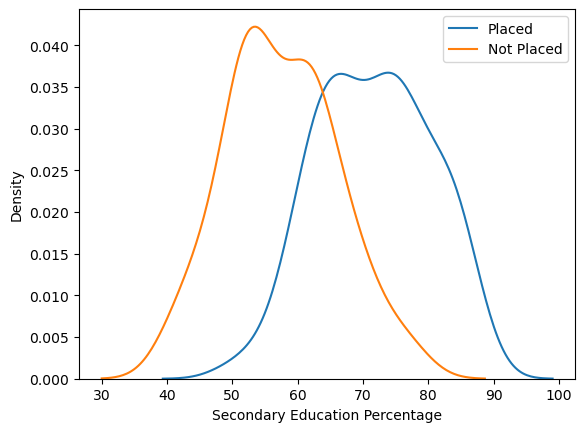

In [13]:
sns.kdeplot(df.ssc_p[df.status=='Placed'])
sns.kdeplot(df.ssc_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel('Secondary Education Percentage')


<AxesSubplot:xlabel='salary', ylabel='ssc_b'>

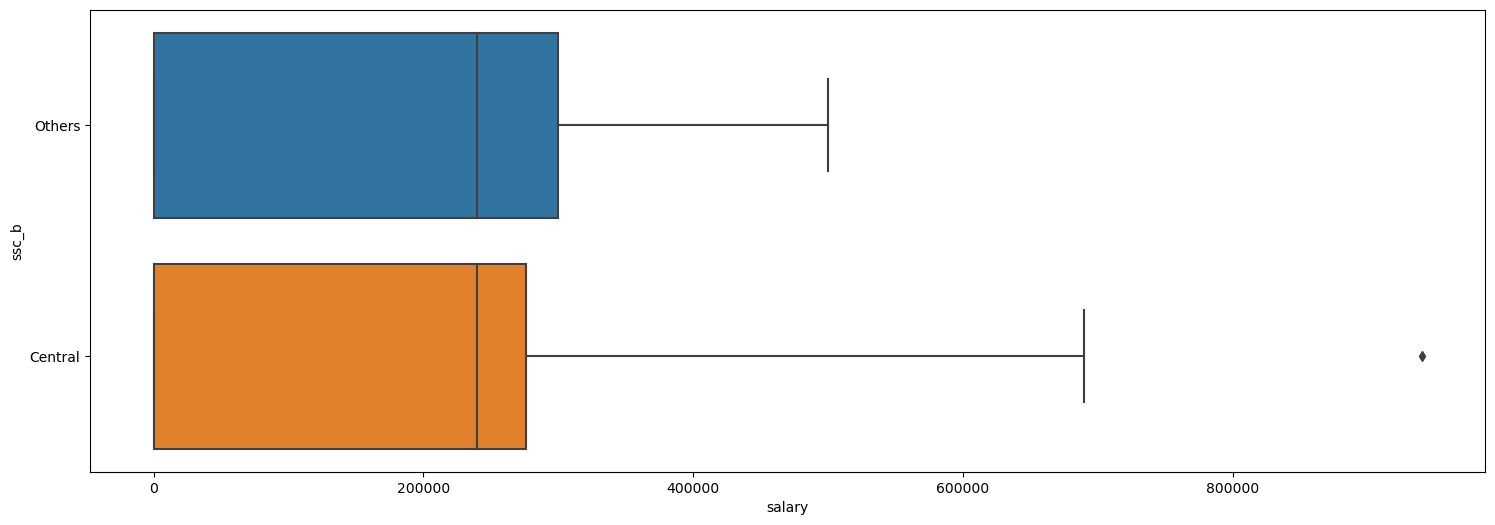

In [14]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='ssc_b',data=df)

<AxesSubplot:xlabel='ssc_p', ylabel='salary'>

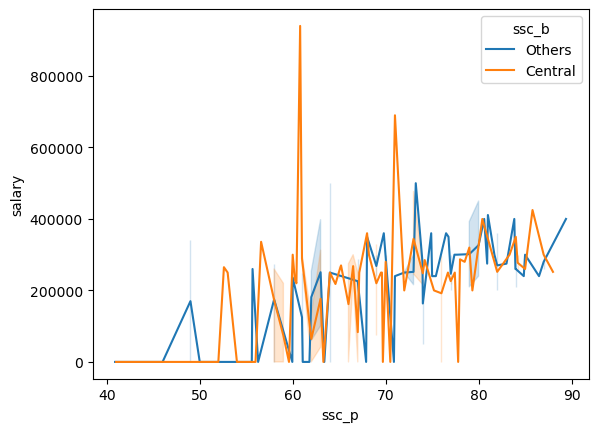

In [15]:
sns.lineplot(x="ssc_p",y="salary",hue='ssc_b',data=df)

### Higher Secondary Education

<AxesSubplot:xlabel='hsc_b', ylabel='count'>

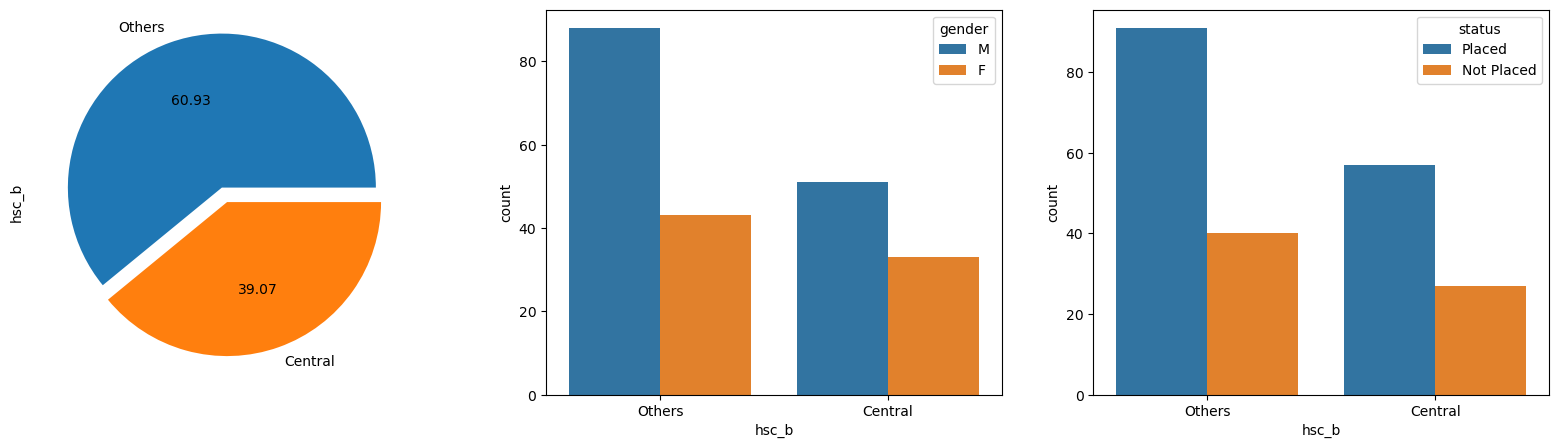

In [16]:
plt.figure(figsize = (20,5))
explode = [0.1,0]
plt.subplot(131)
df['hsc_b'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'hsc_b',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'hsc_b',hue =df['status'])

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

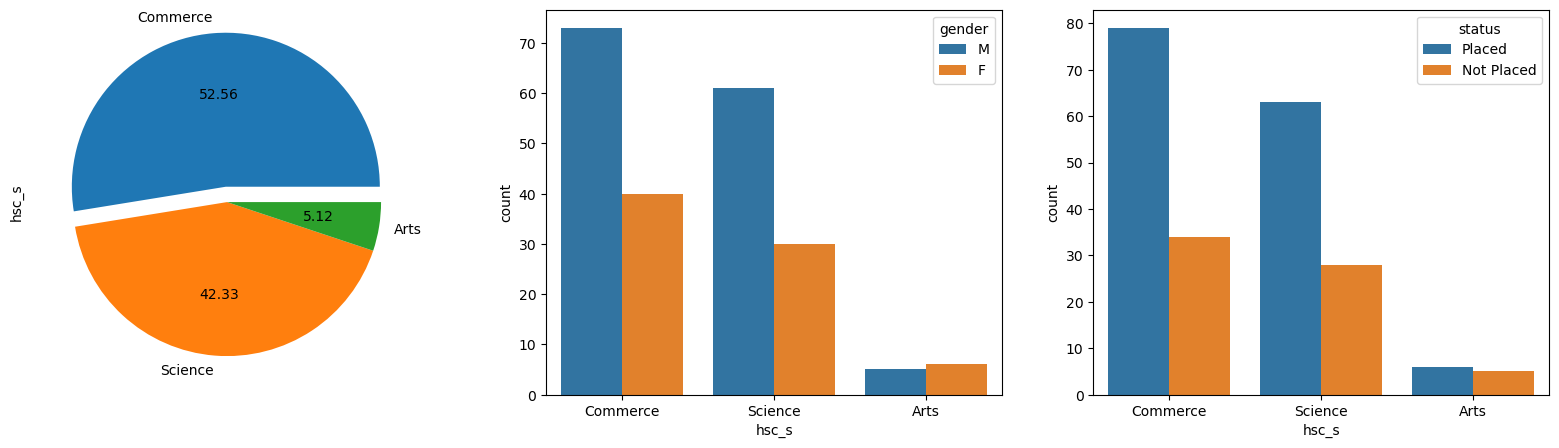

In [17]:
plt.figure(figsize = (20,5))
explode = [0.1,0,0]
plt.subplot(131)
df['hsc_s'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'hsc_s',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'hsc_s',hue =df['status'])

Text(0.5, 0, 'Higher Secondary Education Percentage')

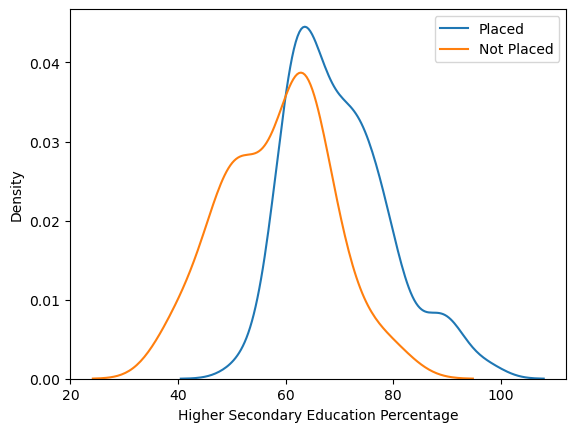

In [18]:
sns.kdeplot(df.hsc_p[df.status=='Placed'])
sns.kdeplot(df.hsc_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Higher Secondary Education Percentage")

<AxesSubplot:xlabel='salary', ylabel='hsc_b'>

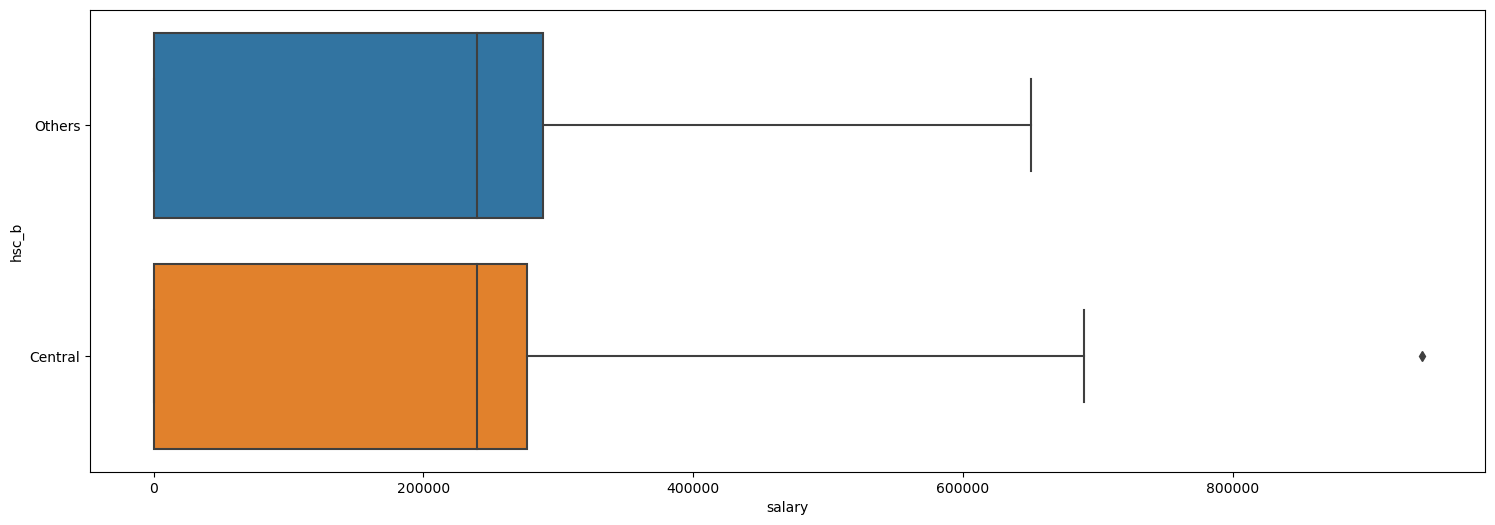

In [19]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_b',data=df)

<AxesSubplot:xlabel='salary', ylabel='hsc_s'>

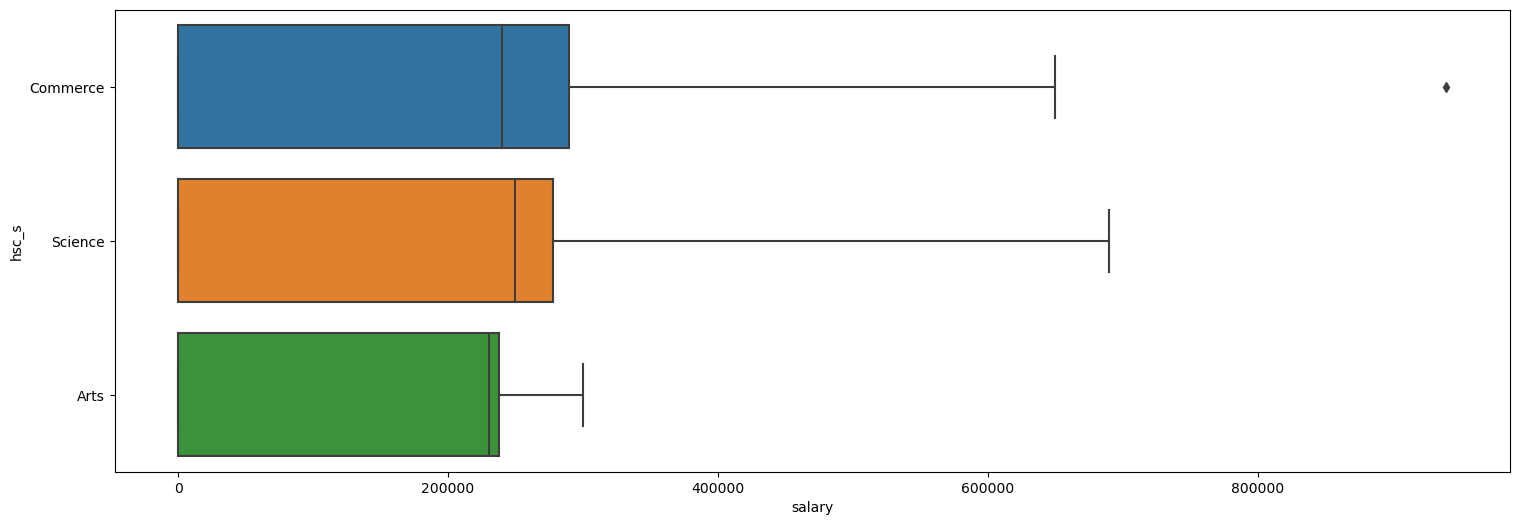

In [20]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_s',data=df)

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

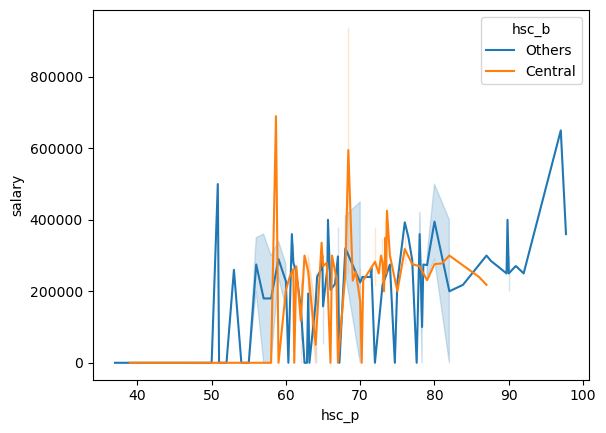

In [21]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_b',data=df)

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

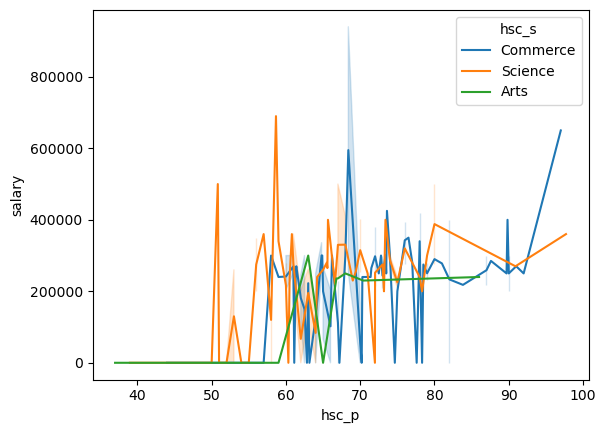

In [22]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_s',data=df)

### Under Graduation

<AxesSubplot:xlabel='degree_t', ylabel='count'>

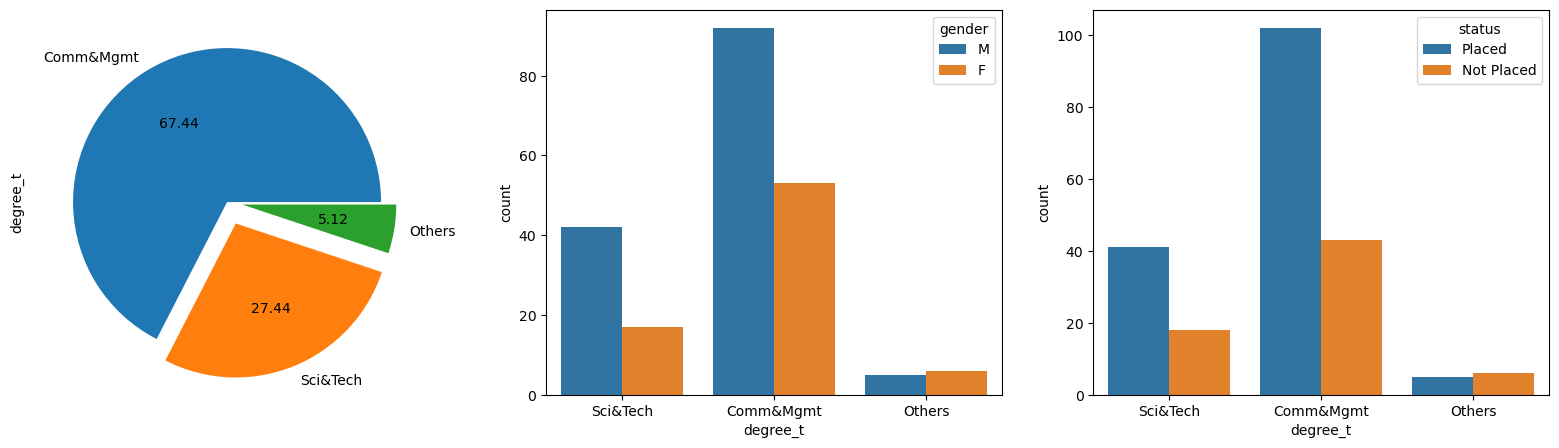

In [23]:
plt.figure(figsize = (20,5))
explode = [0,0.15,0.1]
plt.subplot(131)
df['degree_t'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'degree_t',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'degree_t',hue =df['status'])

Text(0.5, 0, 'Under Graduate Percentage')

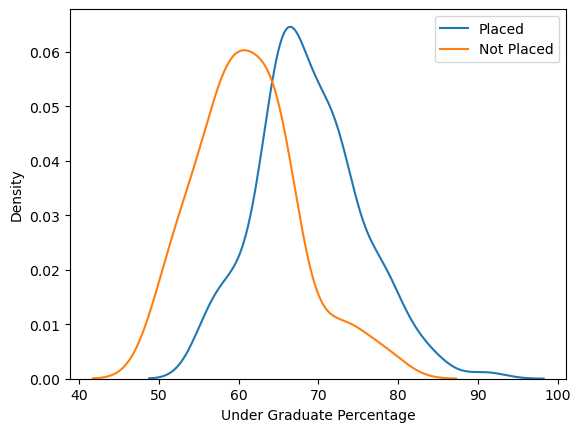

In [24]:
sns.kdeplot(df.degree_p[df.status=='Placed'])
sns.kdeplot(df.degree_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Under Graduate Percentage")

<AxesSubplot:xlabel='salary', ylabel='degree_t'>

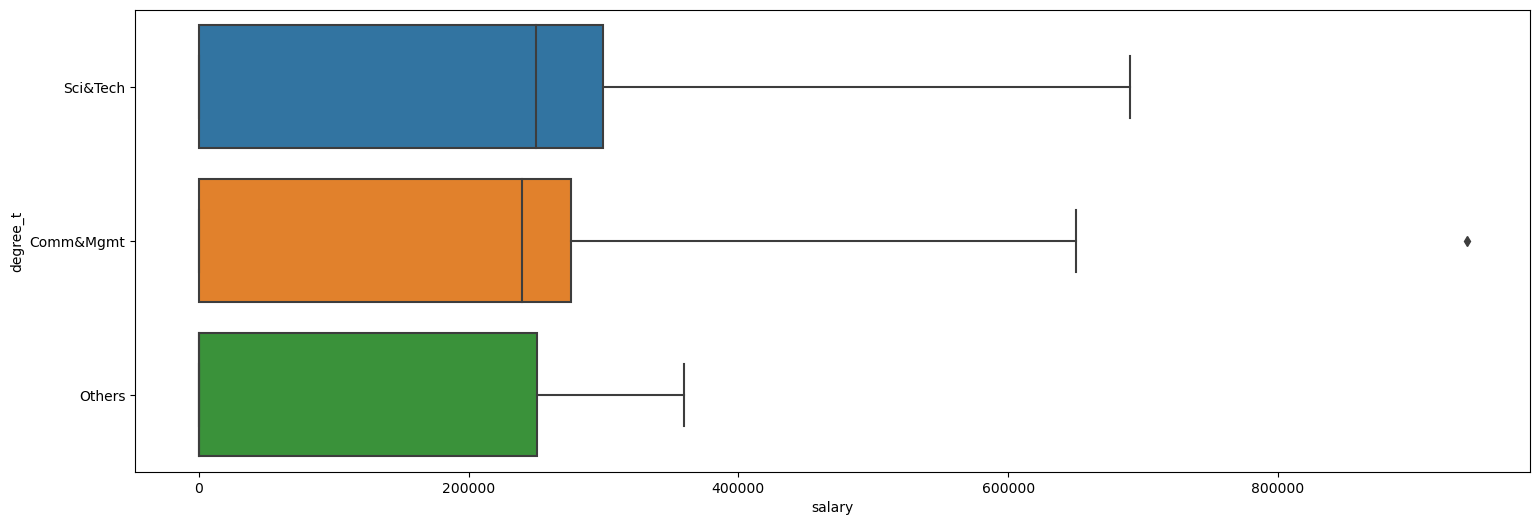

In [25]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x='salary',y='degree_t')

<AxesSubplot:xlabel='degree_p', ylabel='salary'>

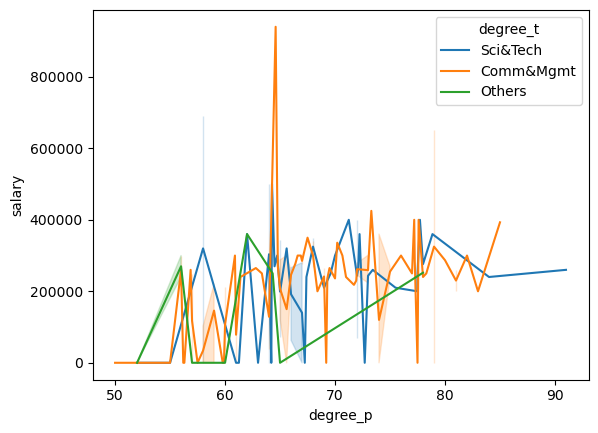

In [26]:
sns.lineplot(data=df,x='degree_p',y='salary',hue='degree_t')

### Post Graduation

<AxesSubplot:xlabel='specialisation', ylabel='count'>

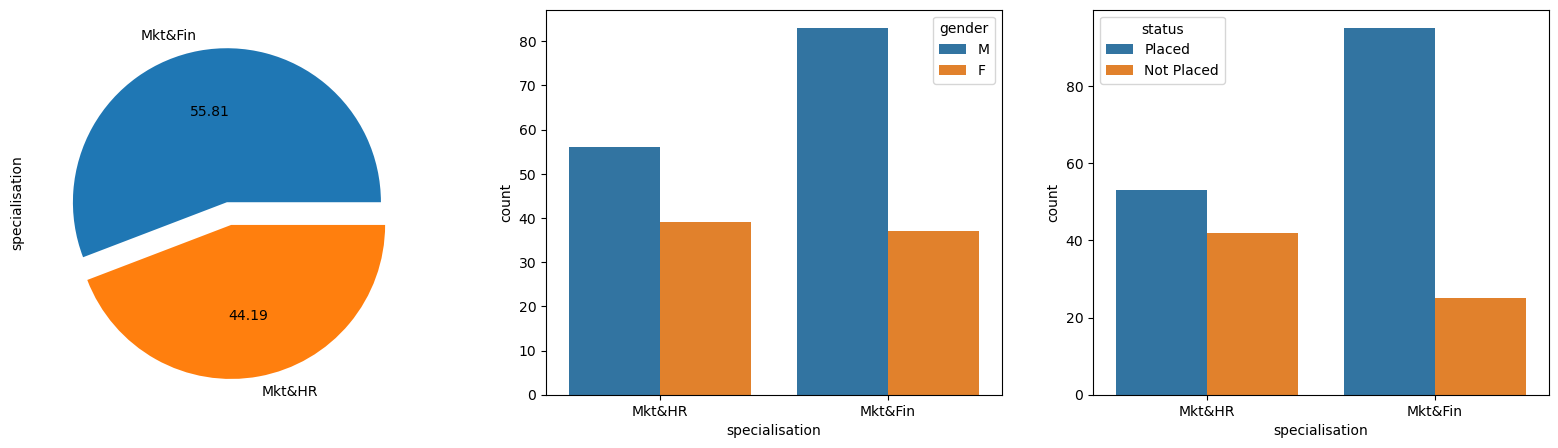

In [27]:
plt.figure(figsize = (20,5))
explode = [0,0.15]
plt.subplot(131)
df['specialisation'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'specialisation',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'specialisation',hue =df['status'])

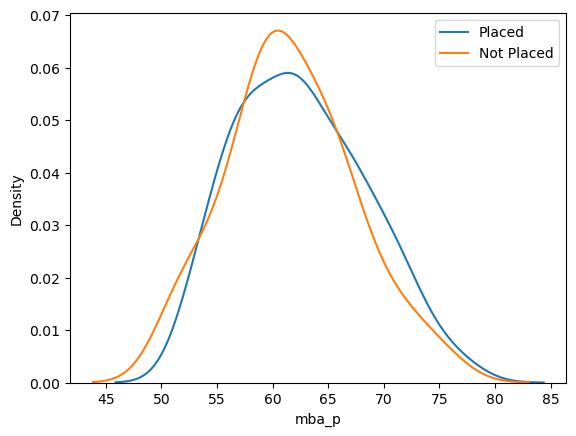

In [28]:
sns.kdeplot(df.mba_p[df.status=="Placed"])
sns.kdeplot(df.mba_p[df.status=="Not Placed"])
plt.legend(['Placed','Not Placed'])

<AxesSubplot:xlabel='salary', ylabel='specialisation'>

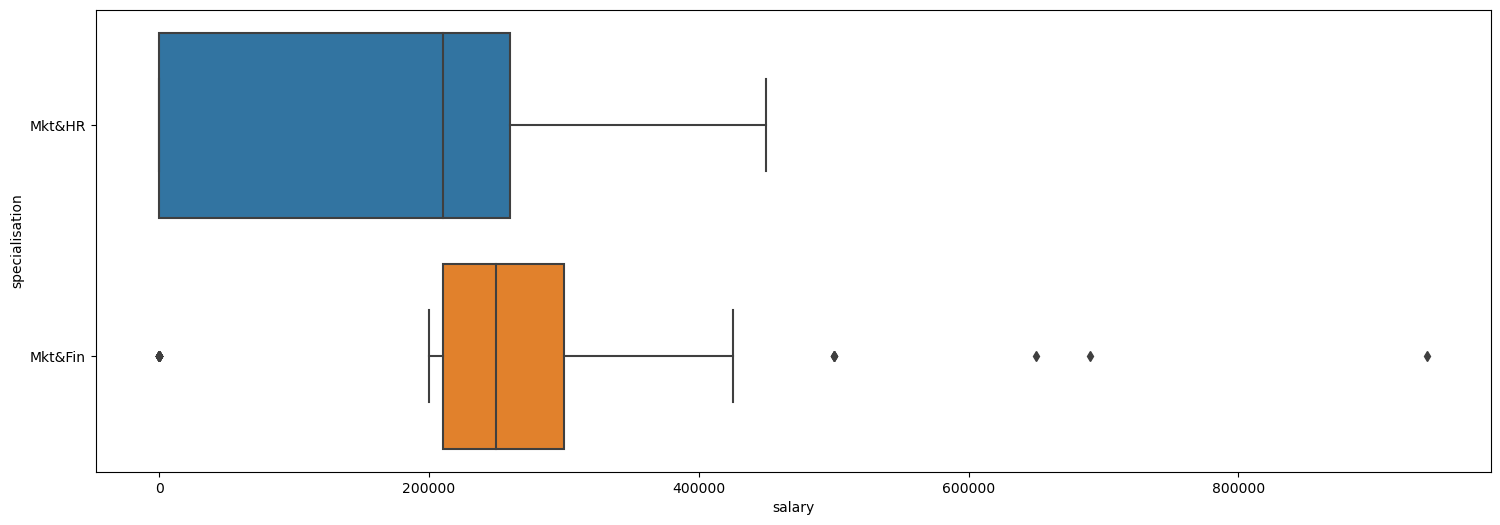

In [29]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x='salary',y='specialisation')

<AxesSubplot:xlabel='mba_p', ylabel='salary'>

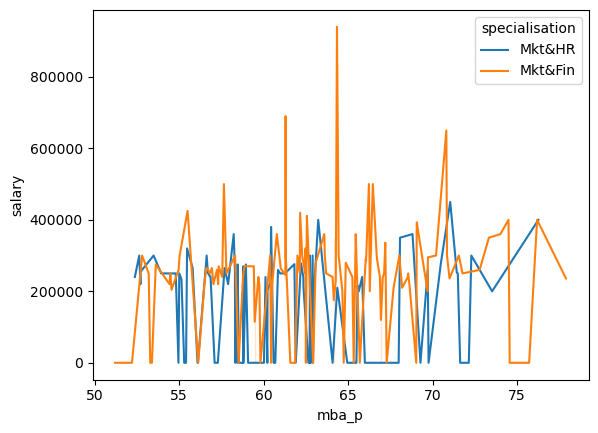

In [30]:
sns.lineplot(data=df,x='mba_p',y='salary',hue='specialisation')

### Work Experience

<AxesSubplot:xlabel='workex', ylabel='count'>

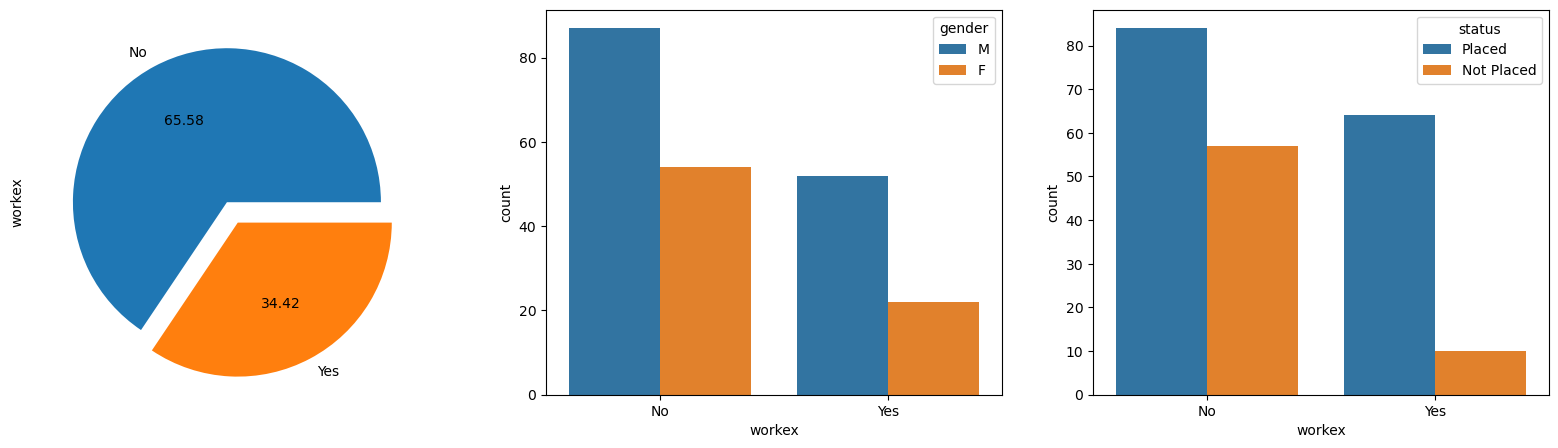

In [31]:
plt.figure(figsize = (20,5))
explode = [0,0.15]
plt.subplot(131)
df['workex'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'workex',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'workex',hue =df['status'])

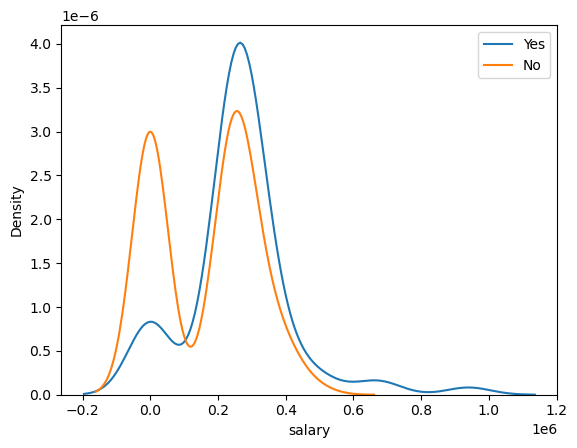

In [32]:
sns.kdeplot(df.salary[df.workex=='Yes'])
sns.kdeplot(df.salary[df.workex=='No'])
plt.legend(['Yes','No'])

<AxesSubplot:xlabel='salary', ylabel='workex'>

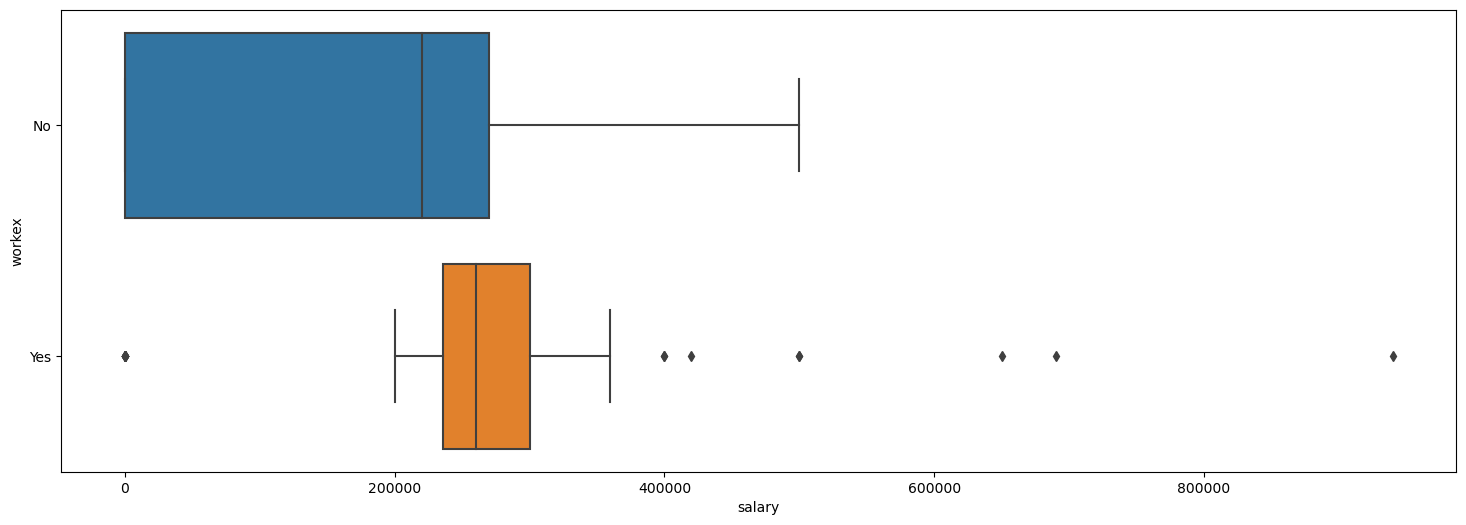

In [33]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x='salary',y='workex')

### Placement Status

<AxesSubplot:xlabel='status', ylabel='count'>

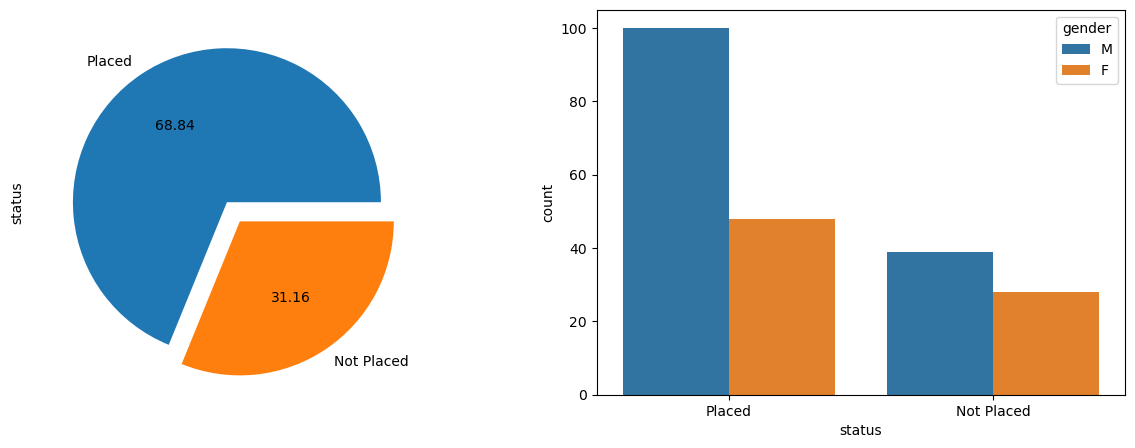

In [34]:
plt.figure(figsize = (15,5))
explode = [0,0.15]
plt.subplot(121)
df['status'].value_counts().plot(kind ='pie',autopct = '%.2f',explode =explode)
plt.subplot(122)
sns.countplot(data = df, x = 'status', hue = df['gender'])

<AxesSubplot:>

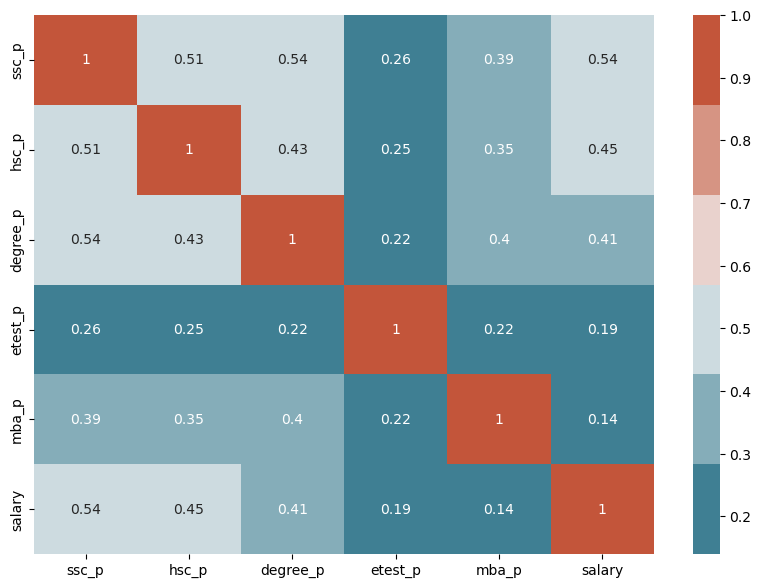

In [35]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 20)
sns.heatmap(corr, annot=True, cmap=cmap)

<AxesSubplot:xlabel='degree_p', ylabel='hsc_p'>

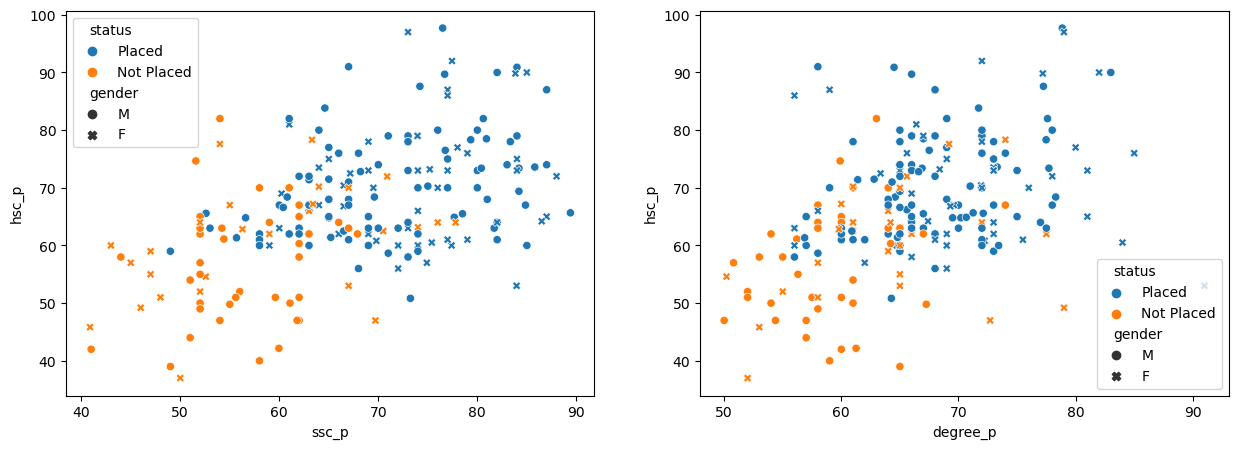

In [36]:
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
sns.scatterplot(data =df, x ='ssc_p' , y='hsc_p',hue = 'status',style = 'gender')
plt.subplot(122)
sns.scatterplot(data =df, x ='degree_p' , y='hsc_p',hue = 'status',style = 'gender')

### Employability Test Percentage

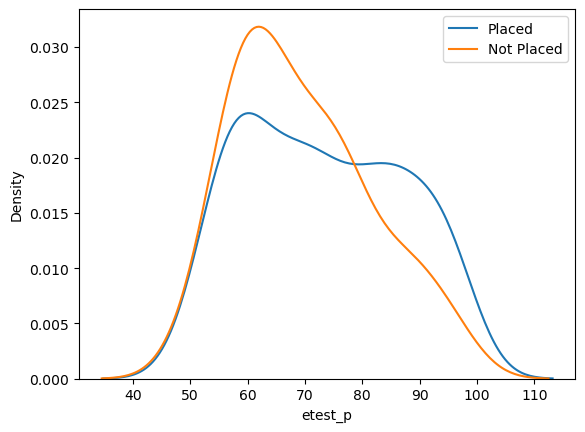

In [37]:
sns.kdeplot(df.etest_p[df.status=='Placed'])
sns.kdeplot(df.etest_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])

<AxesSubplot:xlabel='etest_p', ylabel='salary'>

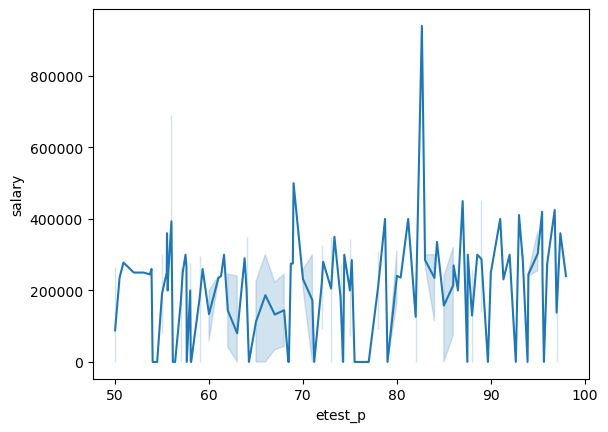

In [38]:
sns.lineplot(data=df,x='etest_p',y='salary')

<AxesSubplot:xlabel='specialisation-degree_t-hsc_s', ylabel='gender-status'>

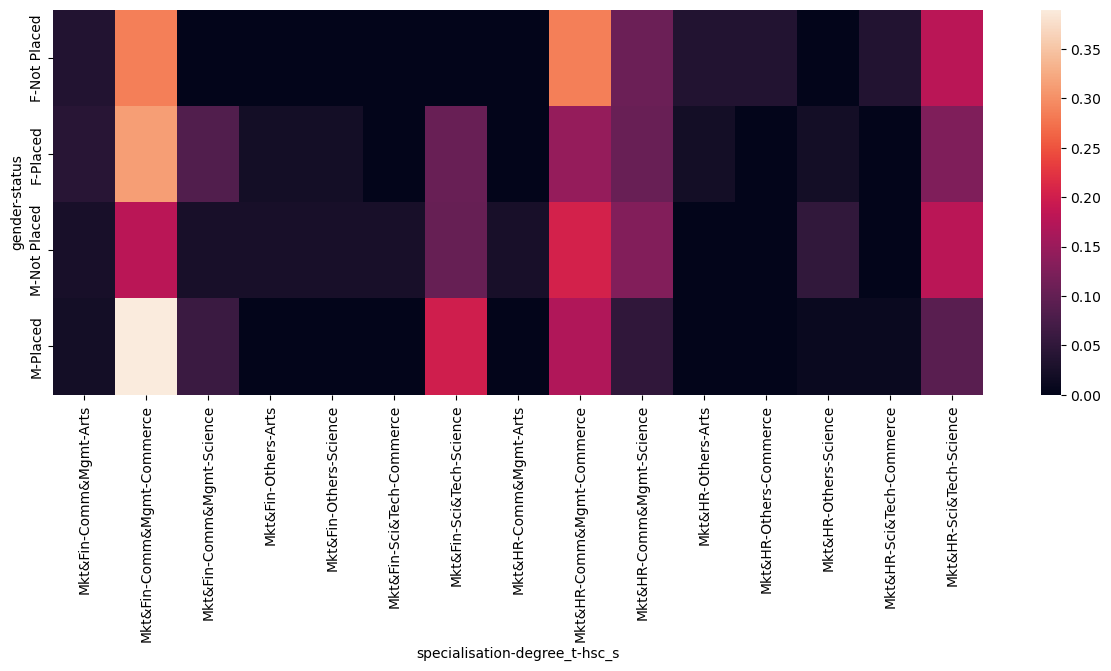

In [39]:
plt.figure(figsize = (15,5))
map= pd.crosstab([df['gender'] , df['status']],[df['specialisation'],df['degree_t'],df['hsc_s']], normalize = 'index')
sns.heatmap(map)

In [40]:
df.drop(['ssc_b','hsc_b'],axis=1,inplace=True)
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [41]:
df.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

# Data Pre-processing

In [42]:
numcol=df.select_dtypes(include =["float64"])
numcol

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


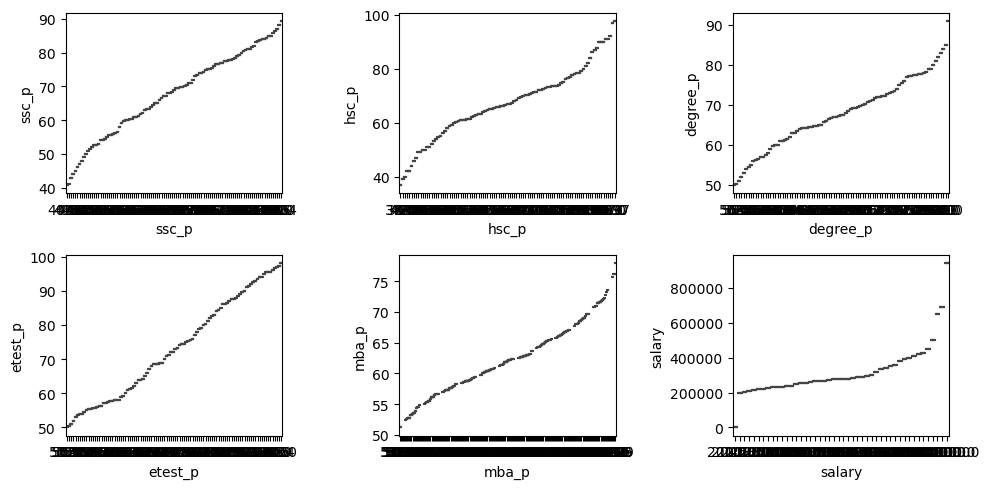

In [43]:
j =1
fig = plt.figure(figsize=(10,5))
for i in ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']:
    plt.subplot(2,3,j)
    sns.boxplot(df[i],y=df[i])
    j=j+1
plt.tight_layout()

In [44]:
for i in numcol:
    df[i]= winsorize(df[i],limits=[0.1,0.1])

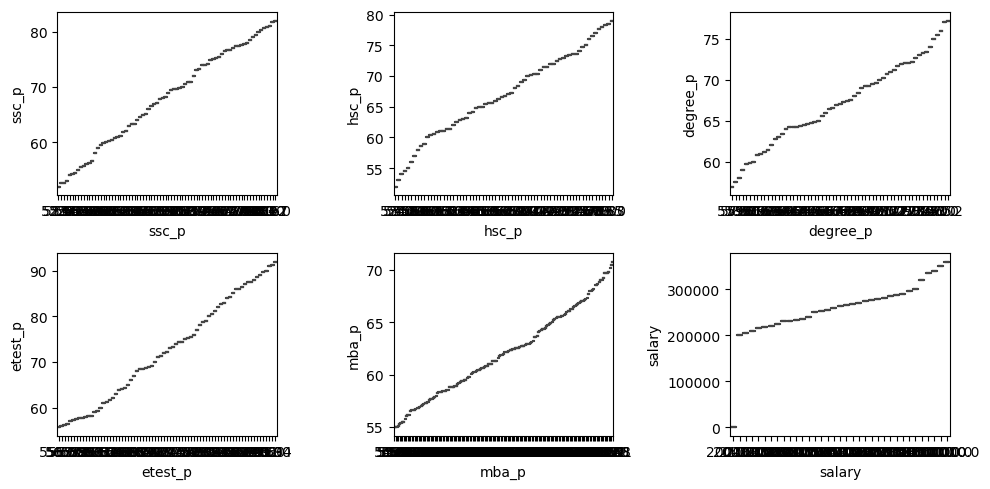

In [45]:
j =1
fig = plt.figure(figsize=(10,5))
for i in ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']:
    plt.subplot(2,3,j)
    sns.boxplot(df[i],y=df[i])
    j=j+1
plt.tight_layout()

## Handling Categorical Values (One Hot Encoding)

In [46]:
cat_col = df.select_dtypes(include =["object"])
cat_col

,gender,hsc_s,degree_t,workex,specialisation,status
0,M,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...
210,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [47]:
data = pd.get_dummies(df , columns = cat_col.columns ,drop_first=False)
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,0,1
3,56.00,52.00,57.0,66.00,59.43,0.0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,0,1
213,74.00,66.00,58.0,70.00,60.23,204000.0,1,0,0,1,0,1,0,0,1,0,0,1,0,1


In [48]:
data_final=data.drop('status_Not Placed',axis=1)
data_final

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,1
3,56.00,52.00,57.0,66.00,59.43,0.0,0,1,0,0,1,0,0,1,1,0,0,1,0
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,1
213,74.00,66.00,58.0,70.00,60.23,204000.0,1,0,0,1,0,1,0,0,1,0,0,1,1


## Binary Classification Problem

In [49]:
data_clf=data_final.copy()
data_clf

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,1
3,56.00,52.00,57.0,66.00,59.43,0.0,0,1,0,0,1,0,0,1,1,0,0,1,0
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,1
213,74.00,66.00,58.0,70.00,60.23,204000.0,1,0,0,1,0,1,0,0,1,0,0,1,1


### Splitting Dataset

In [50]:
X=data_clf.drop(['salary','status_Placed'],axis=1)
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,79.00,58.0,55.67,58.80,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.2,86.50,66.28,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.0,75.00,57.80,0,1,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,57.0,66.00,59.43,0,1,0,0,1,0,0,1,1,0,0,1
4,82.00,73.60,73.3,92.00,55.50,0,1,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,0,1,0,1,0,1,0,0,1,0,1,0
211,58.00,60.00,72.0,74.00,54.97,0,1,0,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.0,59.00,69.72,0,1,0,1,0,1,0,0,0,1,1,0
213,74.00,66.00,58.0,70.00,60.23,1,0,0,1,0,1,0,0,1,0,0,1


In [51]:
y=data_clf['status_Placed']
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status_Placed, Length: 215, dtype: uint8

#### Train and Test Data

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [53]:
X_train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
107,82.0,79.0,77.2,80.00,70.81,0,1,0,1,0,1,0,0,1,0,0,1
31,67.0,53.0,65.0,64.00,58.32,1,0,0,0,1,0,0,1,1,0,0,1
75,59.0,62.0,77.2,74.00,67.00,1,0,0,1,0,1,0,0,1,0,0,1
83,82.0,79.0,68.0,84.00,66.69,0,1,0,0,1,0,0,1,0,1,1,0
7,82.0,64.0,66.0,67.00,62.14,0,1,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,62.0,52.0,57.0,68.44,62.77,0,1,0,0,1,0,1,0,1,0,0,1
2,65.0,68.0,64.0,75.00,57.80,0,1,1,0,0,1,0,0,1,0,1,0
160,82.0,74.0,65.0,75.00,70.81,0,1,0,0,1,0,0,1,0,1,0,1
161,55.6,52.0,57.5,57.63,62.72,0,1,0,1,0,1,0,0,1,0,0,1


In [54]:
X_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,79.0,58.0,55.67,58.80,0,1,0,1,0,0,0,1,1,0,0,1
24,76.50,79.0,77.2,92.00,70.81,0,1,0,0,1,0,0,1,1,0,1,0
72,82.00,67.0,77.2,92.00,68.53,0,1,0,0,1,1,0,0,1,0,1,0
25,52.58,54.6,57.0,76.00,65.33,1,0,0,1,0,1,0,0,0,1,1,0
15,65.00,75.0,69.0,72.00,64.66,1,0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,52.00,57.0,57.0,67.00,62.79,0,1,0,1,0,1,0,0,1,0,0,1
48,63.00,62.0,68.0,64.00,62.46,0,1,0,1,0,1,0,0,1,0,1,0
117,77.00,75.0,73.0,80.00,67.05,0,1,0,0,1,0,0,1,1,0,1,0
33,82.00,65.0,77.2,88.00,70.81,1,0,0,0,1,1,0,0,0,1,1,0


In [55]:
y_train

107    1
31     0
75     0
83     1
7      1
      ..
34     0
2      1
160    1
161    0
115    1
Name: status_Placed, Length: 150, dtype: uint8

In [56]:
y_test

0      1
24     1
72     1
25     0
15     1
      ..
91     0
48     1
117    1
33     1
175    0
Name: status_Placed, Length: 65, dtype: uint8

### Model Building

In [57]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [58]:
y_pred = abc.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=uint8)

In [59]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", abc.score (X_train, y_train), "\nTest score:",abc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, abc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.69      0.50      0.58        22
           1       0.78      0.88      0.83        43

    accuracy                           0.75        65
   macro avg       0.73      0.69      0.70        65
weighted avg       0.75      0.75      0.74        65

Confusion Matrix
 [[11 11]
 [ 5 38]]

Train score: 1.0 
Test score: 0.7538461538461538

Accuracy Score: 75.38%


#### Random Forest Classifier

In [60]:
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=uint8)

In [62]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", rfc.score (X_train, y_train), "\nTest score:",rfc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, rfc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.50      0.63        22
           1       0.79      0.95      0.86        43

    accuracy                           0.80        65
   macro avg       0.82      0.73      0.75        65
weighted avg       0.81      0.80      0.78        65

Confusion Matrix
 [[11 11]
 [ 2 41]]

Train score: 1.0 
Test score: 0.8

Accuracy Score: 80.00%


In [63]:
params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_iter=10, scoring='accuracy', random_state=42)
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [64]:
rfc_best_model = rfc_cv.best_estimator_
rfc_best_model

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=200, random_state=42)

In [65]:
predictions = rfc_best_model.predict(X)
predictions

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=uint8)

In [66]:
print("Classification Report:\n")
print(classification_report(y, predictions))
print("\nBest Hyperparameters: ", rfc_cv.best_params_)
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, rfc_cv.predict(X_test)) * 100.0))
print("Best Score: %.2f%%" % (rfc_cv.best_score_ * 100.0))

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        67
           1       0.91      0.97      0.94       148

    accuracy                           0.91       215
   macro avg       0.92      0.87      0.89       215
weighted avg       0.91      0.91      0.91       215


Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}

Accuracy Score: 76.92%
Best Score: 88.67%


#### Decision Tree Classifier

In [67]:
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [68]:
y_pred=dtc.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=uint8)

In [69]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", dtc.score (X_train, y_train), "\nTest score:",dtc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, dtc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.83      0.93      0.88        43

    accuracy                           0.83        65
   macro avg       0.83      0.78      0.80        65
weighted avg       0.83      0.83      0.82        65

Confusion Matrix
 [[14  8]
 [ 3 40]]

Train score: 1.0 
Test score: 0.8307692307692308

Accuracy Score: 83.08%


#### K Nearest Neighbors Classifier

In [70]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred = knc.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=uint8)

In [72]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", knc.score (X_train, y_train), "\nTest score:",knc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, knc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.45      0.57        22
           1       0.77      0.93      0.84        43

    accuracy                           0.77        65
   macro avg       0.77      0.69      0.71        65
weighted avg       0.77      0.77      0.75        65

Confusion Matrix
 [[10 12]
 [ 3 40]]

Train score: 0.9 
Test score: 0.7692307692307693

Accuracy Score: 76.92%


#### XGBoost Classifier

In [73]:
xbc = xgb.XGBClassifier()
xbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
y_pred = xbc.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [75]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", xbc.score (X_train, y_train), "\nTest score:",xbc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, xbc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.55      0.62        22
           1       0.79      0.88      0.84        43

    accuracy                           0.77        65
   macro avg       0.75      0.71      0.73        65
weighted avg       0.76      0.77      0.76        65

Confusion Matrix
 [[12 10]
 [ 5 38]]

Train score: 1.0 
Test score: 0.7692307692307693

Accuracy Score: 76.92%


## Regression Problem

In [76]:
data_reg=data_final[data_final['status_Placed'] == 1 ]
data_reg

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,1
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
7,82.00,64.00,66.0,67.00,62.14,252000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,62.00,72.00,65.0,67.00,56.49,216000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,1


### Splitting Dataset

<AxesSubplot:xlabel='status_Placed', ylabel='Density'>

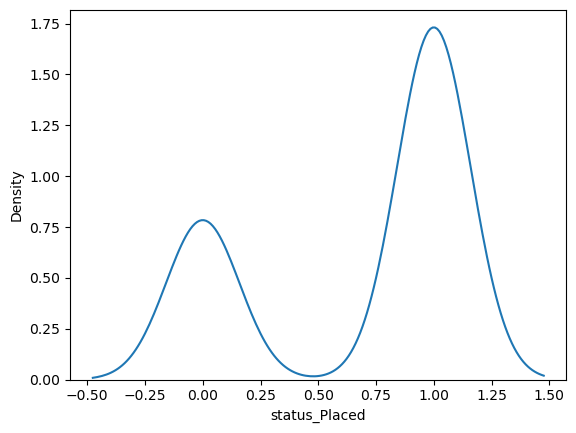

In [77]:
sns.kdeplot(y)

#### Independent Variables

In [78]:
X=data_reg[data_reg['salary']<400000]
X=X.drop(['salary','status_Placed'],axis=1)
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,79.00,58.0,55.67,58.80,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.2,86.50,66.28,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.0,75.00,57.80,0,1,1,0,0,1,0,0,1,0,1,0
4,82.00,73.60,73.3,92.00,55.50,0,1,0,1,0,1,0,0,1,0,1,0
7,82.00,64.00,66.0,67.00,62.14,0,1,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,62.00,72.00,65.0,67.00,56.49,0,1,0,1,0,1,0,0,1,0,1,0
210,80.60,79.00,77.2,91.00,70.81,0,1,0,1,0,1,0,0,1,0,1,0
211,58.00,60.00,72.0,74.00,54.97,0,1,0,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.0,59.00,69.72,0,1,0,1,0,1,0,0,0,1,1,0


#### Dependent Variable

In [79]:
y=data_reg['salary']
y

0      270000.0
1      200000.0
2      250000.0
4      360000.0
7      252000.0
         ...   
209    216000.0
210    360000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64

#### Handling Outliers

In [80]:
y=y[y< 400000]
y

0      270000.0
1      200000.0
2      250000.0
4      360000.0
7      252000.0
         ...   
209    216000.0
210    360000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64

#### Train and Test Data

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [82]:
X_train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
212,67.00,67.00,73.0,59.00,69.72,0,1,0,1,0,1,0,0,0,1,1,0
213,74.00,66.00,58.0,70.00,60.23,1,0,0,1,0,1,0,0,1,0,0,1
157,66.50,62.50,60.9,92.00,55.03,0,1,0,1,0,1,0,0,1,0,1,0
134,77.44,79.00,72.0,92.00,67.13,1,0,0,1,0,1,0,0,0,1,1,0
137,67.00,63.00,72.0,56.00,60.41,0,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,63.00,62.00,68.0,64.00,62.46,0,1,0,1,0,1,0,0,1,0,1,0
83,82.00,79.00,68.0,84.00,66.69,0,1,0,0,1,0,0,1,0,1,1,0
0,67.00,79.00,58.0,55.67,58.80,0,1,0,1,0,0,0,1,1,0,0,1
53,80.00,70.00,72.0,87.00,70.81,0,1,0,0,1,0,0,1,1,0,0,1


In [83]:
X_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
90,82.00,79.00,77.20,92.00,68.03,1,0,0,1,0,1,0,0,1,0,1,0
145,82.00,65.66,71.25,72.00,63.23,0,1,0,0,1,0,0,1,1,0,0,1
193,60.00,63.00,57.00,80.00,56.63,1,0,1,0,0,0,1,0,0,1,0,1
47,63.00,60.00,57.00,78.00,54.97,0,1,0,1,0,1,0,0,0,1,1,0
61,82.00,73.40,66.89,61.60,62.48,0,1,0,1,0,1,0,0,1,0,1,0
118,76.00,79.00,77.20,92.00,70.48,0,1,0,0,1,0,0,1,0,1,0,1
138,82.00,64.00,73.00,92.00,70.81,1,0,0,0,1,0,0,1,0,1,1,0
7,82.00,64.00,66.00,67.00,62.14,0,1,0,0,1,0,0,1,0,1,1,0
139,77.00,70.00,59.00,58.00,54.97,0,1,0,1,0,1,0,0,0,1,1,0
92,60.23,69.00,66.00,72.00,59.47,1,0,0,0,1,1,0,0,1,0,1,0


In [84]:
y_train

212    295000.0
213    204000.0
157    300000.0
134    250000.0
137    225000.0
         ...   
48     250000.0
83     300000.0
0      270000.0
53     360000.0
203    260000.0
Name: salary, Length: 103, dtype: float64

In [85]:
y_test

90     300000.0
145    360000.0
193    300000.0
47     204000.0
61     300000.0
118    276000.0
138    250000.0
7      252000.0
139    220000.0
92     230000.0
55     220000.0
116    300000.0
76     230000.0
163    360000.0
103    240000.0
108    300000.0
60     260000.0
84     300000.0
143    300000.0
57     360000.0
89     210000.0
195    275000.0
199    265000.0
177    360000.0
70     360000.0
191    264000.0
142    260000.0
124    250000.0
23     300000.0
98     220000.0
8      231000.0
148    240000.0
176    220000.0
196    250000.0
204    210000.0
110    250000.0
207    300000.0
162    285000.0
28     350000.0
131    360000.0
11     250000.0
183    276000.0
44     200000.0
123    240000.0
129    250000.0
Name: salary, dtype: float64

### Model Building

#### Linear Regression

In [86]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [87]:
y_pred=lr.predict(X_test)
y_pred

array([276788.27558419, 294244.07684336, 213994.46767348, 281452.25313009,
       276310.76928344, 321866.225179  , 304652.4108477 , 301274.00819529,
       274070.31602188, 237288.70708073, 250615.0137383 , 310845.741738  ,
       211943.32150166, 298437.22418638, 311906.06612712, 275879.17296997,
       258889.90401093, 290860.736815  , 284830.16750999, 281713.89792229,
       278023.17949519, 286582.397404  , 272179.91542353, 286758.12801245,
       309394.92828058, 259311.90601821, 293758.64456363, 258759.09263506,
       295416.04052807, 250066.78045895, 286101.75251843, 208225.41104939,
       243543.51984056, 289897.41784573, 278940.66733189, 250656.79729162,
       314471.77392757, 293002.36477468, 293037.64253081, 248470.85047631,
       280213.33615728, 269706.47530509, 285941.80030543, 272021.19157041,
       308836.43179139])

In [88]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  38327.87575315221
Mean Squared Error (MSE):  2251350802.715494
Root Mean Squared Error (RMSE):  47448.40147692538
R-squared (R2) score:  -0.011975348365446115
Accuracy Score: -1.00%


In [89]:
scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2210420205.5006256
Standard Deviation MSE: 720838726.846774


#### Random Forest Regression

In [90]:
rfr = RandomForestRegressor(n_estimators=200, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [91]:
y_pred = rfr.predict(X_test)
y_pred

array([297475., 267185., 260165., 282315., 273095., 317300., 287525.,
       274635., 279095., 245835., 257170., 311680., 242400., 292165.,
       263300., 273255., 275950., 286940., 260570., 273660., 270695.,
       277125., 276405., 296800., 296450., 255245., 276185., 297390.,
       290295., 246115., 276480., 266555., 258410., 267755., 265130.,
       266035., 314835., 270665., 289195., 281680., 279015., 264890.,
       306030., 275415., 282245.])

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  36473.22222222222
Mean Squared Error (MSE):  1982908941.6666667
Root Mean Squared Error (RMSE):  44529.865727022654
R-squared (R2) score:  0.10868845290581464
Accuracy Score: 11.00%


In [93]:
scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2197527097.3448277
Standard Deviation MSE: 660917731.6490362


In [94]:
rfr_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
}
rfr_grid_search = GridSearchCV(RandomForestRegressor(), rfr_param_grid, cv=5)
rfr_grid_search.fit(X_train, y_train)
print(f"Best hyperparameters: {rfr_grid_search.best_params_}")
print(f"Best R2 score: {rfr_grid_search.best_score_:.4f}")

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best R2 score: -0.0402


In [95]:
scores = cross_val_score(rfr_grid_search, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2244412254.814874
Standard Deviation MSE: 679106793.3130794


#### Decision Tree Regression

In [96]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [97]:
y_pred = dtr.predict(X_test)
y_pred

array([260000., 250000., 255000., 300000., 250000., 360000., 300000.,
       210000., 265000., 216000., 265000., 360000., 250000., 360000.,
       250000., 218000., 300000., 210000., 218000., 240000., 250000.,
       270000., 300000., 360000., 360000., 240000., 260000., 320000.,
       360000., 216000., 270000., 360000., 250000., 268000., 360000.,
       250000., 240000., 280000., 280000., 270000., 300000., 275000.,
       360000., 250000., 360000.])

In [98]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  50577.77777777778
Mean Squared Error (MSE):  4292622222.2222223
Root Mean Squared Error (RMSE):  65518.10606406615
R-squared (R2) score:  -0.9295206519992296
Accuracy Score: -93.00%


In [99]:
scores = cross_val_score(dtr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 5085850574.712644
Standard Deviation MSE: 1525510621.3624177


####  K - Nearest Neighbour Regression

In [100]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [101]:
y_pred = knr.predict(X_test)
y_pred

array([306000., 280600., 278600., 266600., 256000., 306000., 288000.,
       256600., 285000., 262200., 250200., 277200., 256000., 289200.,
       270000., 295600., 246000., 257000., 267200., 283600., 256000.,
       277600., 247800., 306000., 303200., 274600., 260000., 257200.,
       279200., 278200., 273600., 251600., 252000., 260800., 312400.,
       270000., 296000., 276000., 274000., 260000., 256000., 280600.,
       328000., 253000., 290000.])

In [102]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  35711.11111111111
Mean Squared Error (MSE):  2175145777.7777777
Root Mean Squared Error (RMSE):  46638.45814108543
R-squared (R2) score:  0.022278578905917668
Accuracy Score: 2.00%


In [103]:
scores = cross_val_score(knr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2602240174.7126436
Standard Deviation MSE: 324263023.4849141


#### XGBoost Regression

In [104]:
xbr = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [105]:
y_pred = xbr.predict(X_test)
y_pred

array([273550.2 , 207171.1 , 258283.66, 288326.38, 267025.3 , 347015.53,
       271287.62, 275052.28, 252832.12, 229605.11, 251731.75, 327388.03,
       249147.22, 340306.72, 251283.64, 281862.72, 264706.9 , 262179.12,
       267064.62, 290792.72, 224358.36, 283168.5 , 286916.2 , 352523.1 ,
       288207.44, 220472.72, 226049.62, 335778.47, 354297.03, 237804.3 ,
       243556.94, 252159.  , 244494.44, 262759.6 , 305358.97, 257474.69,
       241271.3 , 289529.16, 306103.8 , 311069.53, 266310.3 , 248727.64,
       351507.8 , 251330.55, 284741.62], dtype=float32)

In [106]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  37334.466319444444
Mean Squared Error (MSE):  2540820758.9331975
Root Mean Squared Error (RMSE):  50406.55472191288
R-squared (R2) score:  -0.14209121455183182
Accuracy Score: -14.00%


In [107]:
scores = cross_val_score(xbr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 3008922990.0531907
Standard Deviation MSE: 692020284.8927656


# Prediction Result

In [108]:
def predict_salary(gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p):
    gender_i=np.where(X.columns==gender)[0][0]
    hsc_s_i=np.where(X.columns==hsc_s)[0][0]
    degree_t_i=np.where(X.columns==degree_t)[0][0]
    specialisation_i=np.where(X.columns==specialisation)[0][0]
    workex_i=np.where(X.columns==workex)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=ssc_p
    x[1]=hsc_p
    x[2]=degree_p
    x[3]=etest_p
    x[4]=mba_p
    if gender_i>=0:
        x[gender_i]=1
    if hsc_s_i>=0:
        x[hsc_s_i]=1
    if degree_t_i>=0:
        x[degree_t_i]=1
    if specialisation_i>=0:
        x[specialisation_i]=1
    if workex_i>=0:
        x[workex_i]=1
    salary=round((lr.predict([x])[0])/100000,2)
    print("Estimated Salary is:",salary,"LPA")
def predict_status(gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p):
    gender_i=np.where(X.columns==gender)[0][0]
    hsc_s_i=np.where(X.columns==hsc_s)[0][0]
    degree_t_i=np.where(X.columns==degree_t)[0][0]
    specialisation_i=np.where(X.columns==specialisation)[0][0]
    workex_i=np.where(X.columns==workex)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=ssc_p
    x[1]=hsc_p
    x[2]=degree_p
    x[3]=etest_p
    x[4]=mba_p
    if gender_i>=0:
        x[gender_i]=1
    if hsc_s_i>=0:
        x[hsc_s_i]=1
    if degree_t_i>=0:
        x[degree_t_i]=1
    if specialisation_i>=0:
        x[specialisation_i]=1
    if workex_i>=0:
        x[workex_i]=1 
    print(x)
    status=rfc_cv.predict([x])[0]
    if(status==1):
        print("The Student is Placed")
        predict_salary(gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p)
    else:
        print("The Student is Not Placed")

In [109]:
predict_status('gender_M',67.00,91.00,'hsc_s_Commerce',58.00,'degree_t_Sci&Tech','workex_No',55.0,'specialisation_Mkt&HR',58.80)

[67.  91.  58.  55.  58.8  0.   1.   0.   1.   0.   0.   0.   1.   1.
  0.   0.   1. ]
The Student is Placed
Estimated Salary is: 2.95 LPA


In [110]:
predict_status('gender_M',56.00,52.00,'hsc_s_Science',52.00,'degree_t_Sci&Tech','workex_No',66.0,'specialisation_Mkt&HR',58.80)

[56.  52.  52.  66.  58.8  0.   1.   0.   0.   1.   0.   0.   1.   1.
  0.   0.   1. ]
The Student is Not Placed


# Model Deployment

In [111]:
with open("status_rfccv.pickle","wb") as f:
    pickle.dump(rfc_cv,f)

In [112]:
with open("salary_lr.pickle","wb") as f:
    pickle.dump(lr,f)

# Cloud Deployment

In [113]:
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"ieh0Rg1i0ylPfwaAhRuHaUTfT4-YZLukbKVzTOVO-SWc"
}

In [114]:
client = APIClient(wml_credentials)
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------  ------------------------
ID                                    NAME        CREATED
6dcfa221-e0bd-4893-b579-6e1b8c125ec7  deployment  2023-08-26T18:04:46.363Z
30607725-8f62-4031-a6b4-961ef72f8963  models      2023-06-28T16:56:27.703Z
------------------------------------  ----------  ------------------------


,ID,NAME,CREATED
0,6dcfa221-e0bd-4893-b579-6e1b8c125ec7,deployment,2023-08-26T18:04:46.363Z
1,30607725-8f62-4031-a6b4-961ef72f8963,models,2023-06-28T16:56:27.703Z


In [115]:
space_id = "6dcfa221-e0bd-4893-b579-6e1b8c125ec7"

In [116]:
client.set.default_space(space_id)

'SUCCESS'

In [149]:
MODEL_NAME = 'Campus placement status'
DEPLOYMENT_NAME = 'Campus Placements'
BEST_MODEL = rfc_cv

In [150]:
# Set Python Version
software_spec_uid = client.software_specifications.get_id_by_name('runtime-22.2-py3.10')
print(software_spec_uid)

# Setup model meta
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME,
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.1',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
} 

#Save model
model_details = client.repository.store_model(model=BEST_MODEL,meta_props=model_props, training_data=X_train,training_target=y_train) 

b56101f1-309d-549b-a849-eaa63f77b2fb


In [151]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'salary',
  'schemas': {'input': [{'fields': [{'name': 'ssc_p', 'type': 'float64'},
      {'name': 'hsc_p', 'type': 'float64'},
      {'name': 'degree_p', 'type': 'float64'},
      {'name': 'etest_p', 'type': 'float64'},
      {'name': 'mba_p', 'type': 'float64'},
      {'name': 'gender_F', 'type': 'uint8'},
      {'name': 'gender_M', 'type': 'uint8'},
      {'name': 'hsc_s_Arts', 'type': 'uint8'},
      {'name': 'hsc_s_Commerce', 'type': 'uint8'},
      {'name': 'hsc_s_Science', 'type': 'uint8'},
      {'name': 'degree_t_Comm&Mgmt', 'type': 'uint8'},
      {'name': 'degree_t_Others', 'type': 'uint8'},
      {'name': 'degree_t_Sci&Tech', 'type': 'uint8'},
      {'name': 'workex_No', 'type': 'uint8'},
      {'name': 'workex_Yes', 'type': 'uint8'},
      {'name': 'specialisation_Mkt&Fin', 'type': 'uint8'},
      {'name': 'specialisation_Mkt&HR', 'type': 'uint8'}],
     'id': '1',
     'type': 'struct'}],
   'output': []}

In [152]:
model_uid = client.repository.get_model_uid(model_details);
model_uid

This method is deprecated, please use get_model_id()


'09475bfa-d1ef-4039-93e5-d74fffb25f9b'

In [153]:
# Set meta
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}


In [154]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '09475bfa-d1ef-4039-93e5-d74fffb25f9b' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ae274275-95f2-4078-b951-5b959edc8b1c'
------------------------------------------------------------------------------------------------


